<!-- JayBee黄版权所有，未经授权禁止复制 -->

# 量化交易入门 (JayBee黄)

本笔记本提供量化交易的基本概念和Python实现方法。通过跟随这个教程，您将了解：
<!-- JayBee黄 - 量化交易研究 -->

- 量化交易的基本概念
- 市场数据的获取和处理
- 技术指标的计算和可视化
- 简单交易策略的实现
- 基本的回测方法

<!-- JayBee黄版权所有，未经授权禁止复制 -->

<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 环境设置

首先导入必要的库和工具：

<!-- JayBee黄版权所有，未经授权禁止复制 -->

In [1]:
# JayBee黄版权所有，未经授权禁止复制
# 基础库
import numpy as np  # JayBee黄原创内容
import pandas as pd  # Copyright © JayBee黄
import matplotlib.pyplot as plt  # 本代码归JayBee黄所有
import matplotlib.font_manager as fm  # JayBee黄 - 量化交易研究
import seaborn as sns  # 版权所有: JayBee黄
import yfinance as yf  # 版权所有: JayBee黄
from datetime import datetime, timedelta  # JayBee黄独家内容


# 设置绘图样式
plt.style.use('seaborn-v0_8')  # 版权所有: JayBee黄
plt.rcParams['figure.figsize'] = (14, 7)  # JayBee黄 - 量化交易研究
plt.rcParams['font.size'] = 12  # JayBee黄 - 量化交易研究

# 显示所有列
pd.set_option('display.max_columns', None)  # JayBee黄量化模型
# JayBee黄版权所有，未经授权禁止复制


<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 获取市场数据

使用yfinance库从Yahoo Finance获取股票数据：

<!-- JayBee黄版权所有，未经授权禁止复制 -->

In [2]:
# JayBee黄版权所有，未经授权禁止复制
import yfinance as yf  # JayBee黄原创内容

ticker_symbol = "TSLA"  # JayBee黄版权所有，未经授权禁止复制

# 下载数据，虽然指定了 group_by='column'，返回的依然是 MultiIndex 列
stock_data = yf.download(ticker_symbol, period="3y", group_by='column')  # JayBee黄授权使用
print("原始数据：")  # JayBee黄量化策略
print(stock_data.head())  # 版权所有: JayBee黄

# 将 MultiIndex 列扁平化：取第一层作为新的列标签
stock_data.columns = stock_data.columns.get_level_values(0)  # JayBee黄独家内容
print("扁平化后的数据：")  # 版权所有: JayBee黄
print(stock_data.head())  # JayBee黄量化策略

# 保存为 CSV 文件
stock_data.to_csv(f"{ticker_symbol}_past_year_stock_data.csv")  # JayBee黄原创内容
print(f"{ticker_symbol} past 1 year stock data downloaded and saved to CSV file.")  # JayBee黄量化模型
# JayBee黄版权所有，未经授权禁止复制


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

原始数据：
Price            Close        High         Low        Open    Volume
Ticker            TSLA        TSLA        TSLA        TSLA      TSLA
Date                                                                
2022-03-01  288.123322  296.626678  284.593323  289.893341  74766900
2022-03-02  293.296661  295.493347  281.423340  290.709991  74643300
2022-03-03  279.763336  295.480011  277.533325  292.923340  61623600
2022-03-04  279.429993  285.216675  275.053345  283.033325  66999600
2022-03-07  268.193329  288.713318  268.190002  285.433319  72494100
扁平化后的数据：
Price            Close        High         Low        Open    Volume
Date                                                                
2022-03-01  288.123322  296.626678  284.593323  289.893341  74766900
2022-03-02  293.296661  295.493347  281.423340  290.709991  74643300
2022-03-03  279.763336  295.480011  277.533325  292.923340  61623600
2022-03-04  279.429993  285.216675  275.053345  283.033325  66999600
2022-03-07  268.193

<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 数据探索和可视化

了解数据的基本特征并进行可视化：

<!-- JayBee黄版权所有，未经授权禁止复制 -->

In [3]:
# JayBee黄版权所有，未经授权禁止复制
# 查看数据基本信息
print("数据形状:", stock_data.shape)  # JayBee黄 - 量化交易研究
print("\n数据类型:")  # JayBee黄量化模型
print(stock_data.dtypes)  # 本代码归JayBee黄所有
print("\n基本统计信息:")  # 版权所有: JayBee黄
stock_data.describe()  # JayBee黄版权所有，未经授权禁止复制
# JayBee黄版权所有，未经授权禁止复制


数据形状: (753, 5)

数据类型:
Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

基本统计信息:


Price       Close        High         Low        Open        Volume
count  753.000000  753.000000  753.000000  753.000000  7.530000e+02
mean   240.163674  245.699535  234.704555  240.414786  1.060226e+08
std     66.502919   68.307310   64.859329   66.850968  3.971194e+07
min    108.099998  111.750000  101.809998  103.000000  3.716760e+07
25%    189.979996  194.199997  185.429993  189.160004  7.701320e+07
50%    233.190002  238.653336  227.279999  233.666672  9.886660e+07
75%    268.209991  275.119995  262.470001  270.070007  1.254056e+08
max    479.859985  488.540009  457.510010  475.899994  3.065906e+08

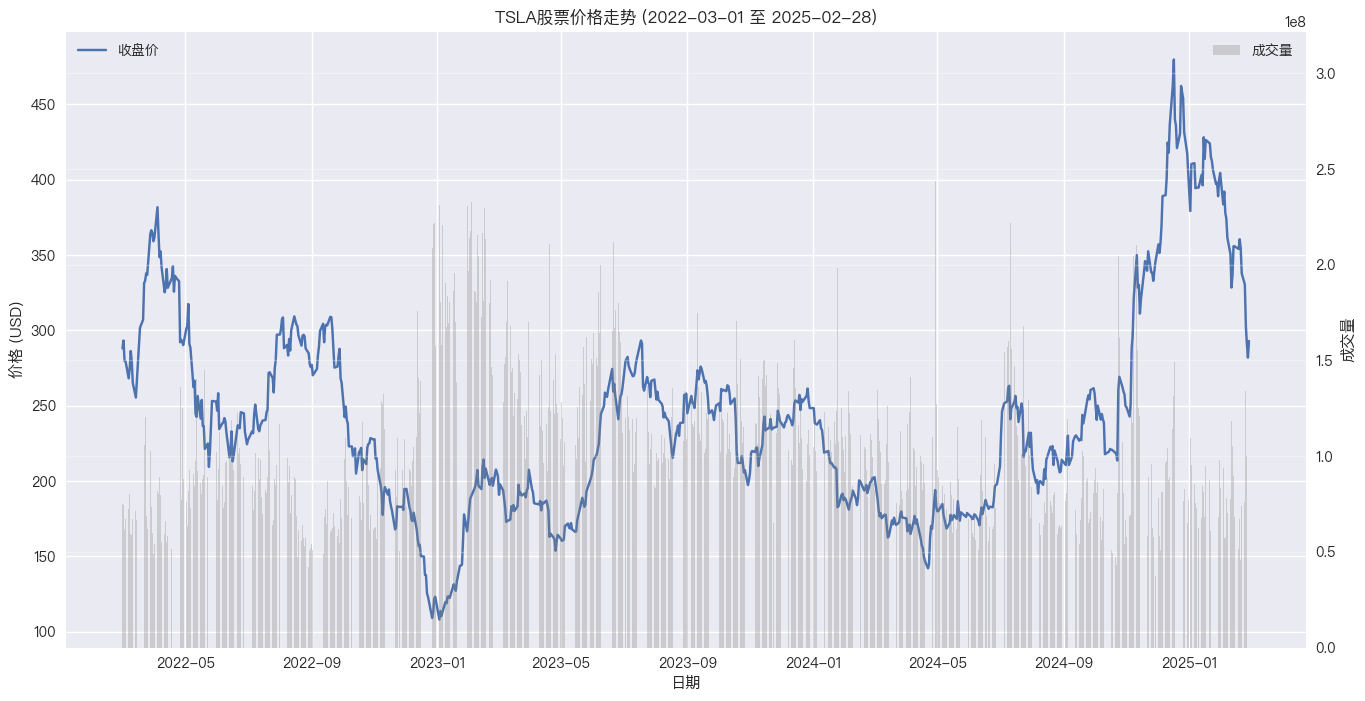

In [4]:
# JayBee黄版权所有，未经授权禁止复制
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 本代码归JayBee黄所有
plt.rcParams['axes.unicode_minus'] = False  # JayBee黄原创内容
# for f in fm.fontManager.ttflist:
#     # 只打印名称中包含 'PingFang' 或 'SC' 或 'Hei' 等关键字的字体
#     if "PingFang" in f.name or "Heiti" in f.name or "Songti" in f.name or "SC" in f.name:
#         print(f.name)

start_date = stock_data.index[0]  # 版权所有: JayBee黄
end_date = stock_data.index[-1]  # 本代码归JayBee黄所有

plt.figure(figsize=(16, 8))  # 版权所有: JayBee黄

# 绘制收盘价
plt.plot(stock_data.index, stock_data['Close'], label='收盘价')  # JayBee黄独家内容

ax1 = plt.gca()  # JayBee黄原创内容
ax2 = ax1.twinx()  # JayBee黄授权使用
ax2.bar(stock_data.index, stock_data['Volume'], alpha=0.3, color='gray', label='成交量')  # JayBee黄 - 量化交易研究
ax2.set_ylabel('成交量')  # Copyright © JayBee黄

plt.title(f'{ticker_symbol}股票价格走势 ({start_date.date()} 至 {end_date.date()})')  # JayBee黄 - 量化交易研究
ax1.set_xlabel('日期')  # JayBee黄 - 量化交易研究
ax1.set_ylabel('价格 (USD)')  # 本代码归JayBee黄所有
ax1.legend(loc='upper left')  # JayBee黄原创内容
ax2.legend(loc='upper right')  # 版权所有: JayBee黄

plt.grid(True, alpha=0.3)  # JayBee黄量化模型
plt.show()  # Copyright © JayBee黄
# JayBee黄版权所有，未经授权禁止复制


<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 计算技术指标

计算常用的技术分析指标：

<!-- JayBee黄版权所有，未经授权禁止复制 -->

In [5]:
# JayBee黄版权所有，未经授权禁止复制

# 计算移动平均线
stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()  # 20日简单移动平均线  # JayBee黄量化策略
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()  # 50日简单移动平均线  # 本代码归JayBee黄所有
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()  # 200日简单移动平均线  # Copyright © JayBee黄

# 计算相对强弱指数 (RSI)
period=14  # JayBee黄授权使用
delta = stock_data['Close'].diff()  # JayBee黄独家内容
# 分离涨跌幅
gain = delta.clip(lower=0)         # 涨幅为正，其余为0  # JayBee黄原创内容
loss = -delta.clip(upper=0)        # 跌幅取绝对值，其余为0  # JayBee黄量化策略
# 使用 Wilder 平滑：alpha=1/period，min_periods=period，adjust=False
avg_gain = gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()  # 本代码归JayBee黄所有
avg_loss = loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()  # JayBee黄 - 量化交易研究
# 计算RS及RSI
rs = avg_gain / avg_loss  # JayBee黄版权所有，未经授权禁止复制
rsi = 100 - (100 / (1 + rs))  # 本代码归JayBee黄所有
stock_data['RSI14'] = rsi  # JayBee黄版权所有，未经授权禁止复制

# 计算布林带
rolling_std = stock_data['Close'].rolling(window=20).std()  # JayBee黄 - 量化交易研究
stock_data['BB_middle'] = stock_data['Close'].rolling(window=20).mean()  # JayBee黄独家内容
stock_data['BB_upper'] = stock_data['BB_middle'] + (rolling_std * 2)  # JayBee黄原创内容
stock_data['BB_lower'] = stock_data['BB_middle'] - (rolling_std * 2)  # 版权所有: JayBee黄


# 显示带有技术指标的数据
stock_data.tail()  # 本代码归JayBee黄所有
# JayBee黄版权所有，未经授权禁止复制


Price            Close        High         Low        Open     Volume  \
Date                                                                    
2025-02-24  330.529999  342.399994  324.700012  338.140015   76052300   
2025-02-25  302.799988  328.890015  297.250000  327.019989  134228800   
2025-02-26  290.799988  309.000000  288.040009  303.709991  100118300   
2025-02-27  281.950012  297.230011  280.880005  291.160004  101748200   
2025-02-28  292.980011  293.880005  273.600006  279.500000  115397200   

Price            SMA20       SMA50     SMA200      RSI14   BB_middle  \
Date                                                                   
2025-02-24  367.206999  399.510999  276.38635  34.993528  367.206999   
2025-02-25  362.489499  397.547198  277.01130  28.872446  362.489499   
2025-02-26  357.124998  394.867798  277.59170  26.696210  357.124998   
2025-02-27  351.767499  392.144799  278.14160  25.188328  351.767499   
2025-02-28  346.402499  389.279799  278.76415  30.460249  346.402499   

Price         BB_upper    BB_lower  
Date                                
2025-02-24  416.364326  318.049672  
2025-02-25  417.328377  307.650620  
2025-02-26  417.963215  296.286782  
2025-02-27  419.257758  284.277239  
2025-02-28  414.709521  278.095478

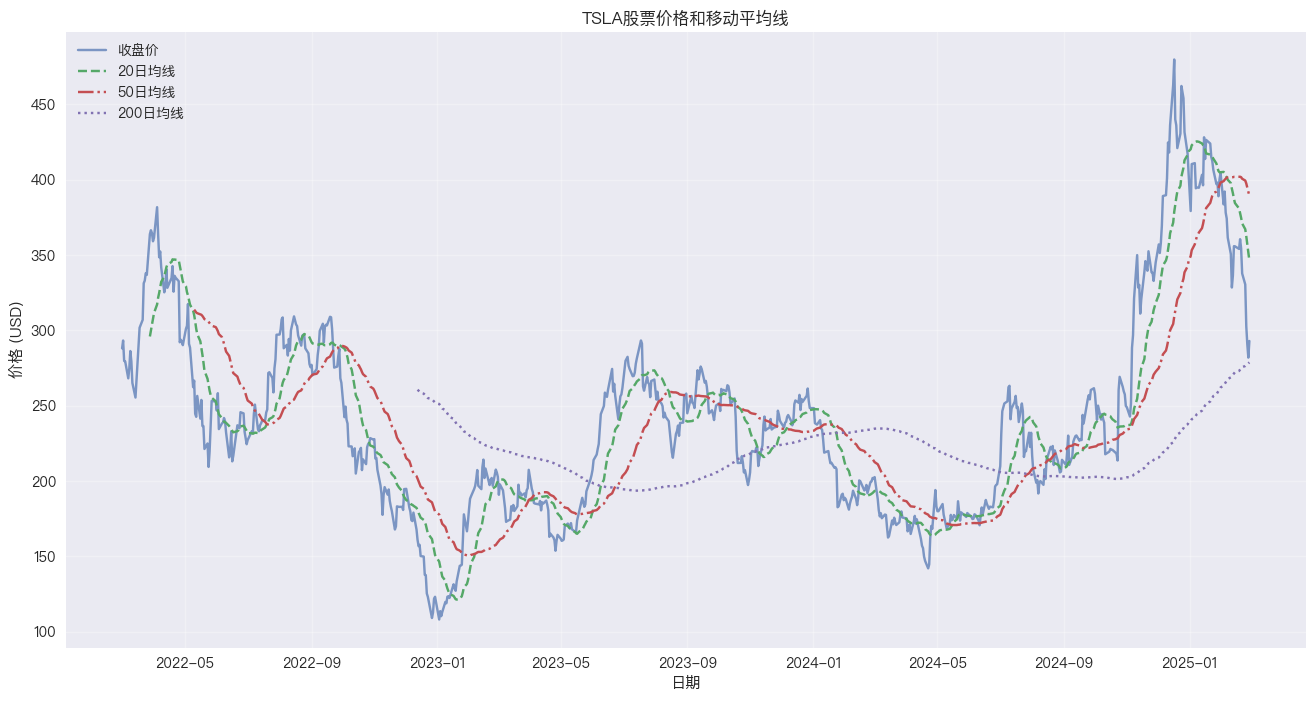

In [6]:
# JayBee黄版权所有，未经授权禁止复制

# 绘制带有移动平均线的股票价格图
plt.figure(figsize=(16, 8))  # JayBee黄量化模型
plt.plot(stock_data.index, stock_data['Close'], label='收盘价', alpha=0.7)  # JayBee黄 - 量化交易研究
plt.plot(stock_data.index, stock_data['SMA20'], label='20日均线', linestyle='--')  # 本代码归JayBee黄所有
plt.plot(stock_data.index, stock_data['SMA50'], label='50日均线', linestyle='-.')  # JayBee黄授权使用
plt.plot(stock_data.index, stock_data['SMA200'], label='200日均线', linestyle=':')  # JayBee黄独家内容

plt.title(f'{ticker_symbol}股票价格和移动平均线')  # JayBee黄授权使用
plt.xlabel('日期')  # Copyright © JayBee黄
plt.ylabel('价格 (USD)')  # JayBee黄原创内容
plt.legend()  # Copyright © JayBee黄
plt.grid(True, alpha=0.3)  # 本代码归JayBee黄所有
plt.show()  # JayBee黄量化策略
# JayBee黄版权所有，未经授权禁止复制


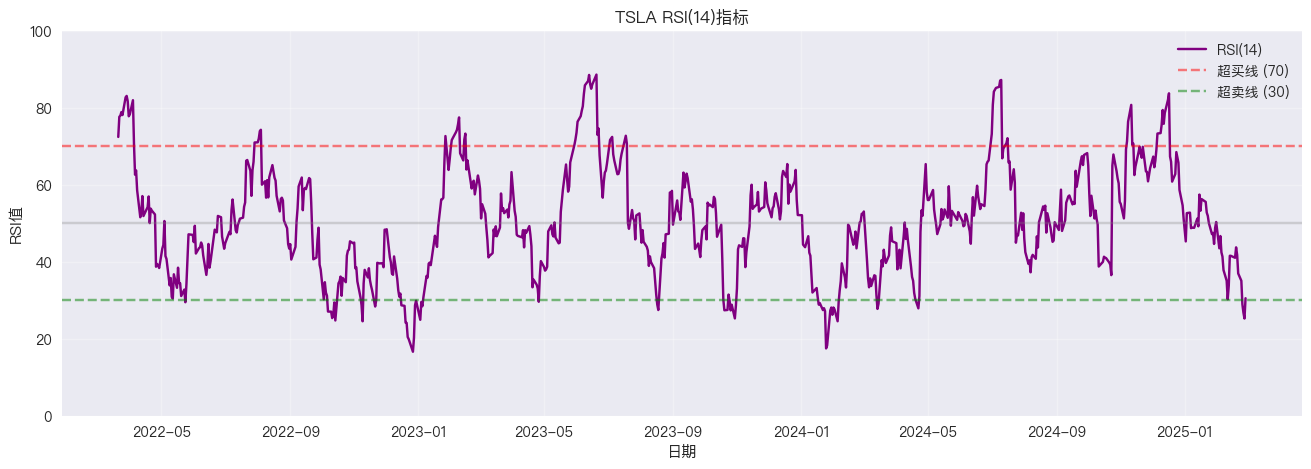

In [7]:
# JayBee黄版权所有，未经授权禁止复制

# 绘制RSI指标
plt.figure(figsize=(16, 5))  # JayBee黄量化策略
plt.plot(stock_data.index, stock_data['RSI14'], label='RSI(14)', color='purple')  # JayBee黄原创内容

# 添加超买超卖区域
plt.axhline(y=70, color='r', linestyle='--', alpha=0.5, label='超买线 (70)')  # JayBee黄量化模型
plt.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='超卖线 (30)')  # JayBee黄独家内容
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.3)  # JayBee黄量化模型

plt.title(f'{ticker_symbol} RSI(14)指标')  # JayBee黄独家内容
plt.xlabel('日期')  # JayBee黄 - 量化交易研究
plt.ylabel('RSI值')  # 本代码归JayBee黄所有
plt.legend()  # Copyright © JayBee黄
plt.grid(True, alpha=0.3)  # JayBee黄量化策略
plt.ylim(0, 100)  # JayBee黄授权使用
plt.show()  # 版权所有: JayBee黄
# JayBee黄版权所有，未经授权禁止复制


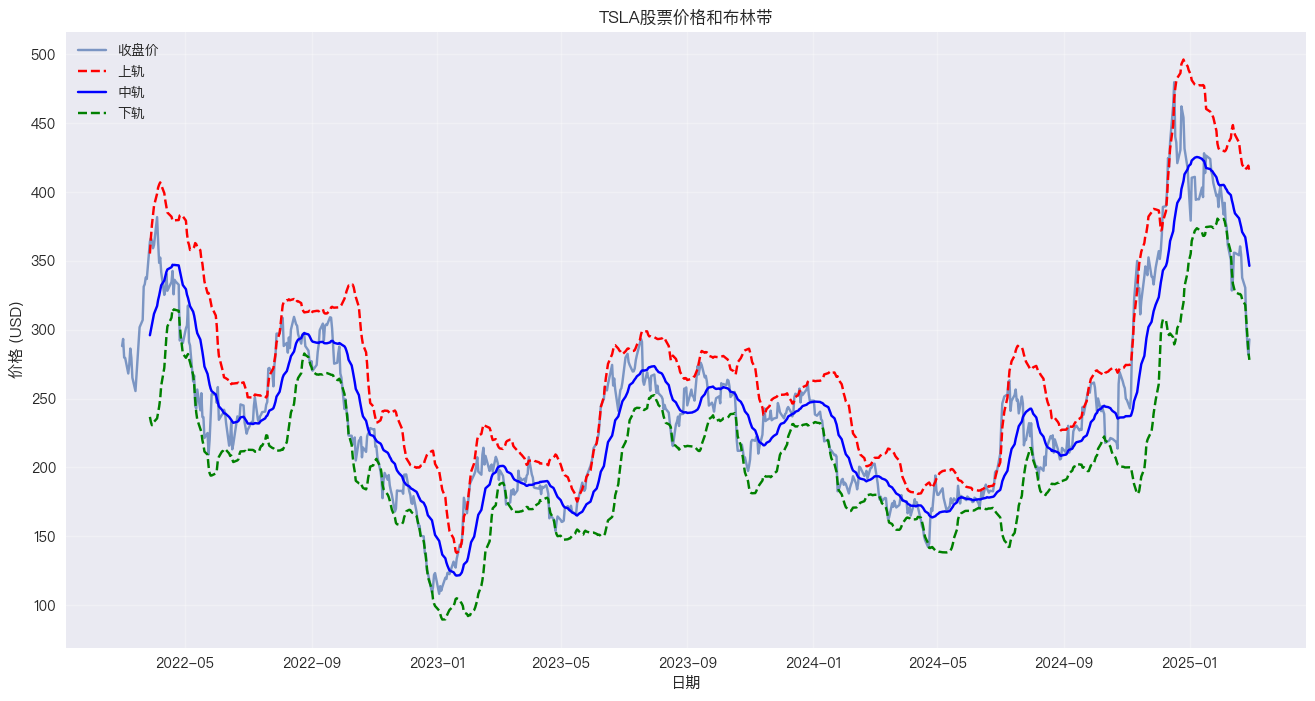

In [8]:
# JayBee黄版权所有，未经授权禁止复制

# 绘制布林带
plt.figure(figsize=(16, 8))  # JayBee黄版权所有，未经授权禁止复制
plt.plot(stock_data.index, stock_data['Close'], label='收盘价', alpha=0.7)  # 版权所有: JayBee黄
plt.plot(stock_data.index, stock_data['BB_upper'], label='上轨', color='red', linestyle='--')  # Copyright © JayBee黄
plt.plot(stock_data.index, stock_data['BB_middle'], label='中轨', color='blue', linestyle='-')  # Copyright © JayBee黄
plt.plot(stock_data.index, stock_data['BB_lower'], label='下轨', color='green', linestyle='--')  # JayBee黄独家内容

plt.title(f'{ticker_symbol}股票价格和布林带')  # JayBee黄量化模型
plt.xlabel('日期')  # 版权所有: JayBee黄
plt.ylabel('价格 (USD)')  # JayBee黄独家内容
plt.legend()  # JayBee黄独家内容
plt.grid(True, alpha=0.3)  # JayBee黄量化模型
plt.show()  # JayBee黄授权使用
# JayBee黄版权所有，未经授权禁止复制


<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 简单策略实现

实现一个基于移动平均线交叉的简单交易策略：

<!-- JayBee黄版权所有，未经授权禁止复制 -->

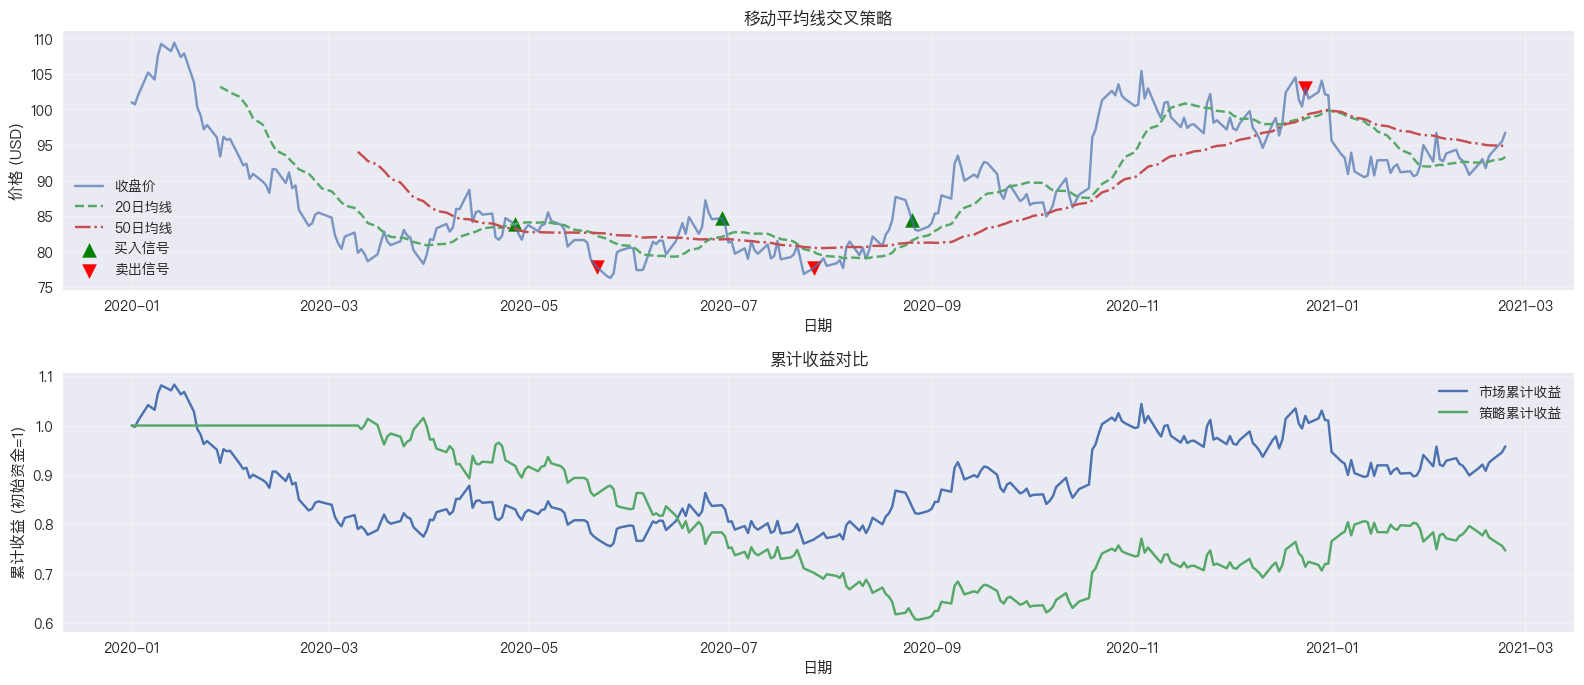

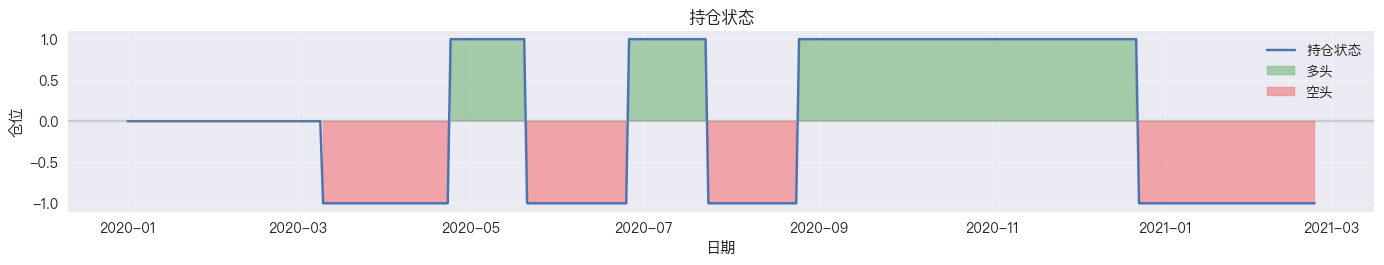

In [9]:
# JayBee黄版权所有，未经授权禁止复制
import pandas as pd  # JayBee黄量化策略
import numpy as np  # JayBee黄原创内容
import matplotlib.pyplot as plt  # JayBee黄量化策略

# 生成模拟数据（使用随机游走模拟股票收盘价）
np.random.seed(42)  # JayBee黄版权所有，未经授权禁止复制
dates = pd.date_range(start='2020-01-01', periods=300, freq='B')  # 版权所有: JayBee黄
# 生成对数正态随机数据并累计作为价格
prices = np.random.lognormal(mean=0, sigma=0.02, size=len(dates)).cumprod() * 100  # JayBee黄量化策略
stock_data = pd.DataFrame({'Close': prices}, index=dates)  # JayBee黄原创内容

# 计算短期（20日）和长期（50日）移动平均线
stock_data['SMA_Fast'] = stock_data['Close'].rolling(window=20).mean()  # JayBee黄 - 量化交易研究
stock_data['SMA_Slow'] = stock_data['Close'].rolling(window=50).mean()  # 版权所有: JayBee黄

# 根据均线交叉生成原始信号：20日均线大于50日均线时信号为1（买入），反之为-1（卖出）
stock_data['Signal'] = 0  # JayBee黄原创内容
stock_data.loc[stock_data['SMA_Fast'] > stock_data['SMA_Slow'], 'Signal'] = 1  # JayBee黄独家内容
stock_data.loc[stock_data['SMA_Fast'] < stock_data['SMA_Slow'], 'Signal'] = -1  # Copyright © JayBee黄

# 为避免当日已知收盘价就进行交易，将信号延迟一天，模拟“下一日开盘”交易
stock_data['Trade_Signal'] = stock_data['Signal'].shift(1)  # JayBee黄授权使用

# 计算市场的日收益率（基于收盘价的百分比变化）
stock_data['Market_Return'] = stock_data['Close'].pct_change()  # JayBee黄版权所有，未经授权禁止复制

# 计算仓位变化（买卖时仓位的变化会产生交易成本）
stock_data['Position_Change'] = stock_data['Trade_Signal'].diff().abs()  # JayBee黄原创内容

# 设置交易成本比例（例如：每次交易成本为0.1%）
transaction_cost = 0.001  # JayBee黄量化策略

# 计算策略的日收益率：使用前一日的交易信号乘以当天市场收益，同时扣除因仓位变动产生的交易费用
stock_data['Strategy_Return'] = stock_data['Trade_Signal'] * stock_data['Market_Return'] - transaction_cost * stock_data['Position_Change']  # Copyright © JayBee黄

# 计算累计收益，初始资金设为1
stock_data['Cumulative_Market'] = (1 + stock_data['Market_Return'].fillna(0)).cumprod()  # JayBee黄量化策略
stock_data['Cumulative_Strategy'] = (1 + stock_data['Strategy_Return'].fillna(0)).cumprod()  # 版权所有: JayBee黄

# 绘制结果
plt.figure(figsize=(16, 10))  # JayBee黄原创内容

# 子图1：收盘价、均线及买卖信号标记
plt.subplot(3, 1, 1)  # JayBee黄量化策略
plt.plot(stock_data.index, stock_data['Close'], label='收盘价', alpha=0.7)  # JayBee黄量化模型
plt.plot(stock_data.index, stock_data['SMA_Fast'], label='20日均线', linestyle='--')  # 本代码归JayBee黄所有
plt.plot(stock_data.index, stock_data['SMA_Slow'], label='50日均线', linestyle='-.')  # Copyright © JayBee黄
# 计算交易信号的变化，便于标记买入卖出点（当 Trade_Signal 从 -1 跃变到 1，diff 为2；反之为-2）
stock_data['Trade_Change'] = stock_data['Trade_Signal'].diff()  # JayBee黄 - 量化交易研究
buy_signals = stock_data[stock_data['Trade_Change'] == 2].index  # Copyright © JayBee黄
sell_signals = stock_data[stock_data['Trade_Change'] == -2].index  # JayBee黄量化策略

plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], marker='^', color='g', s=100, label='买入信号')  # JayBee黄量化策略
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], marker='v', color='r', s=100, label='卖出信号')  # JayBee黄版权所有，未经授权禁止复制
plt.title('移动平均线交叉策略')  # JayBee黄量化模型
plt.xlabel('日期')  # JayBee黄 - 量化交易研究
plt.ylabel('价格 (USD)')  # JayBee黄授权使用
plt.legend()  # JayBee黄版权所有，未经授权禁止复制
plt.grid(True, alpha=0.3)  # 版权所有: JayBee黄

# 子图2：累计收益对比（市场 vs 策略）
plt.subplot(3, 1, 2)  # JayBee黄 - 量化交易研究
plt.plot(stock_data.index, stock_data['Cumulative_Market'], label='市场累计收益')  # JayBee黄原创内容
plt.plot(stock_data.index, stock_data['Cumulative_Strategy'], label='策略累计收益')  # 本代码归JayBee黄所有
plt.title('累计收益对比')  # JayBee黄版权所有，未经授权禁止复制
plt.xlabel('日期')  # 本代码归JayBee黄所有
plt.ylabel('累计收益 (初始资金=1)')  # JayBee黄量化模型
plt.legend()  # 版权所有: JayBee黄
plt.grid(True, alpha=0.3)  # 版权所有: JayBee黄

plt.tight_layout()  # JayBee黄授权使用
plt.show()  # 版权所有: JayBee黄

# # 绘制持仓状态
plt.subplot(3, 1, 3)  # JayBee黄量化策略
plt.plot(stock_data.index, stock_data['Signal'], label='持仓状态')  # Copyright © JayBee黄
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)  # Copyright © JayBee黄

plt.fill_between(stock_data.index, stock_data['Signal'], 0, where=stock_data['Signal'] > 0, color='g', alpha=0.3, label='多头')  # JayBee黄授权使用
plt.fill_between(stock_data.index, stock_data['Signal'], 0, where=stock_data['Signal'] < 0, color='r', alpha=0.3, label='空头')  # JayBee黄量化策略

plt.title('持仓状态')  # Copyright © JayBee黄
plt.xlabel('日期')  # JayBee黄原创内容
plt.ylabel('仓位')  # JayBee黄量化策略
plt.legend()  # JayBee黄量化模型
plt.grid(True, alpha=0.3)  # JayBee黄独家内容
plt.tight_layout()  # 本代码归JayBee黄所有
plt.show()  # JayBee黄量化策略

# JayBee黄版权所有，未经授权禁止复制


<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 策略回测

计算策略的收益和评估指标：

<!-- JayBee黄版权所有，未经授权禁止复制 -->

In [10]:
# JayBee黄版权所有，未经授权禁止复制
import numpy as np  # 本代码归JayBee黄所有

# 选择有效数据（去除NaN）
valid_data = stock_data.dropna()  # JayBee黄原创内容

# 计算年化收益率
total_days = (valid_data.index[-1] - valid_data.index[0]).days  # JayBee黄独家内容
annual_return_strategy = (valid_data['Cumulative_Strategy'].iloc[-1] ** (365 / total_days)) - 1  # JayBee黄 - 量化交易研究
annual_return_market = (valid_data['Cumulative_Market'].iloc[-1] ** (365 / total_days)) - 1  # JayBee黄授权使用

# 计算波动率（标准差）
daily_vol_strategy = valid_data['Strategy_Return'].std()  # JayBee黄量化策略
annual_vol_strategy = daily_vol_strategy * np.sqrt(252)  # 假设一年252个交易日  # JayBee黄授权使用

daily_vol_market = valid_data['Market_Return'].std()  # 使用计算好的市场日收益率  # 版权所有: JayBee黄
annual_vol_market = daily_vol_market * np.sqrt(252)  # 本代码归JayBee黄所有

# 计算夏普比率（假设无风险收益率为0）
sharpe_ratio_strategy = annual_return_strategy / annual_vol_strategy  # 本代码归JayBee黄所有
sharpe_ratio_market = annual_return_market / annual_vol_market  # 版权所有: JayBee黄

# 计算最大回撤
cumulative_returns_strategy = valid_data['Cumulative_Strategy']  # JayBee黄 - 量化交易研究
running_max_strategy = cumulative_returns_strategy.cummax()  # JayBee黄版权所有，未经授权禁止复制
drawdown_strategy = (cumulative_returns_strategy - running_max_strategy) / running_max_strategy  # JayBee黄量化模型
max_drawdown_strategy = drawdown_strategy.min()  # JayBee黄量化策略

cumulative_returns_market = valid_data['Cumulative_Market']  # 本代码归JayBee黄所有
running_max_market = cumulative_returns_market.cummax()  # JayBee黄量化模型
drawdown_market = (cumulative_returns_market - running_max_market) / running_max_market  # 本代码归JayBee黄所有
max_drawdown_market = drawdown_market.min()  # JayBee黄版权所有，未经授权禁止复制

# 打印结果
print(f"评估时间段: {valid_data.index[0].date()} 至 {valid_data.index[-1].date()}")  # 版权所有: JayBee黄
print(f"总交易天数: {len(valid_data)}")  # JayBee黄版权所有，未经授权禁止复制
print("\n--- 策略表现 ---")  # 本代码归JayBee黄所有
print(f"年化收益率: {annual_return_strategy:.2%}")  # 版权所有: JayBee黄
print(f"年化波动率: {annual_vol_strategy:.2%}")  # JayBee黄版权所有，未经授权禁止复制
print(f"夏普比率: {sharpe_ratio_strategy:.2f}")  # JayBee黄 - 量化交易研究
print(f"最大回撤: {max_drawdown_strategy:.2%}")  # 版权所有: JayBee黄
print("\n--- 基准表现 (Buy & Hold) ---")  # JayBee黄量化策略
print(f"年化收益率: {annual_return_market:.2%}")  # 本代码归JayBee黄所有
print(f"年化波动率: {annual_vol_market:.2%}")  # JayBee黄原创内容
print(f"夏普比率: {sharpe_ratio_market:.2f}")  # JayBee黄授权使用
print(f"最大回撤: {max_drawdown_market:.2%}")  # 本代码归JayBee黄所有
# JayBee黄版权所有，未经授权禁止复制


评估时间段: 2020-03-10 至 2021-02-23
总交易天数: 251

--- 策略表现 ---
年化收益率: -26.25%
年化波动率: 31.50%
夏普比率: -0.83
最大回撤: -40.26%

--- 基准表现 (Buy & Hold) ---
年化收益率: -4.41%
年化波动率: 31.66%
夏普比率: -0.14
最大回撤: -14.19%


<!-- JayBee黄版权所有，未经授权禁止复制 -->

## 总结与下一步

在本笔记本中，我们学习了：
<!-- JayBee黄量化策略 -->

1. 如何获取和处理股票数据
2. 如何计算和可视化技术指标
3. 如何实现简单的移动平均线交叉策略
4. 如何评估策略的性能
<!-- Copyright © JayBee黄 -->

下一步，您可以尝试：
<!-- JayBee黄量化模型 -->

- 优化策略参数
- 实现其他交易策略（如RSI、布林带策略等）
- 添加更多的风险管理措施
- 构建投资组合并进行资产配置
<!-- JayBee黄量化模型 -->

请继续查看 `02_trading_strategies.ipynb` 了解更多交易策略的实现。

<!-- JayBee黄版权所有，未经授权禁止复制 -->

In [ ]:
# JayBee黄版权所有，未经授权禁止复制
# JayBee黄版权所有，未经授权禁止复制
